In [1]:
import numpy as np
import seaborn as sb
from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# 성능 측정 지표 모듈
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error

import sys
sys.path.append("../../")
import helper

# 문제1

In [2]:
origin = read_excel("https://data.hossam.kr/E04/beans.xlsx")
origin.head()

,수분함유량,강도
0,36,29
1,40,32
2,34,29
3,44,40
4,33,31


## 독립변수에 대한 다항식 생성

In [3]:
poly = PolynomialFeatures(include_bias=False)
# 2차원 형태인 만큼 [] 개수 유의 - 차원은 그래프 외에는 알 방법이 없음.
# ValueError Expected 2D array, got 1D array instead: 형식의 에러 메세지가 발생
fit=poly.fit_transform(origin[['수분함유량']])
# fit
x = DataFrame(fit, columns=poly.get_feature_names_out())
x.head()

,수분함유량,수분함유량^2
0,36.0,1296.0
1,40.0,1600.0
2,34.0,1156.0
3,44.0,1936.0
4,33.0,1089.0


## 종속변수 추출

In [4]:
y = origin[['강도']]
y.head()

,강도
0,29
1,32
2,29
3,40
4,31


## `데이터 분할`

In [5]:
# random_state로 학습 데이터 조합 설정 가능(데이터 분할 고정)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=777)
# (데이터 수, 변수 수)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7, 2), (3, 2), (7, 1), (3, 1))

## 회귀분석 수행 및 결과

In [6]:
model = LinearRegression()
fit = model.fit(x_train, y_train)

print("계수 :", fit.coef_)
print("절편 :", fit.intercept_)
print("훈련 데이터 설명력 :", fit.score(x_train, y_train))
print("검증 데이터 설명력 :", fit.score(x_test, y_test))

계수 : [[-8.95732508  0.12757362]]
절편 : [187.1535559]
훈련 데이터 설명력 : 0.9448979471844701
검증 데이터 설명력 : -21.73959958757719


## `예측값 생성`

### 훈련 데이터

In [7]:
y_train_pred = fit.predict(x_train)
y_train_pred = y_train_pred.reshape(-1) #차원변경
y_train_pred

array([40.01378066, 30.48950045, 30.02526454, 32.97834468, 30.02526454,
       32.97834468, 30.48950045])

### 검증 데이터

In [8]:
y_test_pred = fit.predict(x_test)
y_test_pred = y_test_pred.reshape(-1)
y_test_pred

array([30.07960791, 30.02526454, 40.50287097])

## `회귀분석 모델의 성능 평가`

### 1) `설명력`

#### $R^2$ (결정계수)

회귀분석에서 가장 많이 채택되는 설명력 값

기본적으로 모델의 학습 결과를 갖고 있는 `fit`객체의 `score()`메서드를 통해서 조회 가능

In [9]:
print("훈련 데이터 설명력 :", fit.score(x_train,y_train))
print("검증 데이터 설명력 :", fit.score(x_test,y_test))

훈련 데이터 설명력 : 0.9448979471844701
검증 데이터 설명력 : -21.73959958757719


sklearn이 제공하는 `metrics`객체의 `r2_score()`메서드를 통해서도 조회할 수 있다.

이 때 파라미터는 관측치와 예측치를 전달한다.

In [10]:
# print("훈련 데이터 설명력 :", r2_score(y_train, y_train_pred))
# print("검증 데이터 설명력 :", r2_score(y_test, y_test_pred))

### 2) `에러율`

| 종류   | 이름                             | 한글명            | 잔차계산 | 이상치에 영향 여부 |
|------|--------------------------------|----------------|------|------------|
| MAE  | Mean Absolute Error            | 평균절대오차         | 절대값  | Yes        |
| MSE  | Mean Squared Error             | 평균제곱오차         | 제곱값  | No         |
| RMSE | Root Mean Squared Error        | 평균오차           | 제곱값  | No         |
| MAPE | Mean Absolute Percentage Error | 평균 절대 백분 오차 비율 | 절대값  | Yes        |
| MPE  | Mean Percentage Error          | 평균 비율 오차       | N/A  | Yes        |

#### $MAE$ (Mean Absolute Error) : 평균절대오차

In [11]:
print("훈련 데이터 MAE :", mean_absolute_error(y_train, y_train_pred))
print("검증 데이터 MAE :", mean_absolute_error(y_test, y_test_pred))

훈련 데이터 MAE : 0.7162543796946262
검증 데이터 MAE : 5.869247805758344


#### $MSE$ (Mean Squared Error) - 평균 제곱 오차

In [12]:
print("훈련 데이터 MSE :", mean_squared_error(y_train, y_train_pred))
print("검증 데이터 MSE :", mean_squared_error(y_test, y_test_pred))

훈련 데이터 MSE : 0.6432321267445539
검증 데이터 MSE : 80.8519096447189


#### $RMSE$ (Root Mean Squared Error) : 평균 오차

In [13]:
print("훈련 데이터 RMSE :", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("검증 데이터 RMSE :", np.sqrt(mean_squared_error(y_test, y_test_pred)))

훈련 데이터 RMSE : 0.8020175351852065
검증 데이터 RMSE : 8.991768994181228


#### $MAPE$ (Mean Absolute Percentage Error) : 평균 절대 백분오차 비율

In [14]:
# API로 제공되는 기능이 아니고, 
# 직접 계산해야 하기 때문에 관측치와 예측치의 데이터 타입이 일치해야함.
# -> numpy 배열 혹은 Series 타입으로 통일해야 한다.
print("훈련 데이터 MAPE :", np.mean(np.abs((y_train.values - y_train_pred) / y_train.values)) * 100)
print("검증 데이터 MAPE :", np.mean(np.abs((y_test.values - y_test_pred) / y_test.values)) * 100)

훈련 데이터 MAPE : 10.112398453415748
검증 데이터 MAPE : 21.808608888348314


#### $MPE$ (Mean Percentage Error) : 평균 비율 오차

In [15]:
# 관측치와 예측치의 데이터 타입이 일치해야함.
# -> numpy 배열 혹은 Series 타입으로 통일해야 한다.
# 절대값 제외
print("훈련 데이터 MPE :", np.mean((y_train.values - y_train_pred) / y_train.values) * 100)
print("검증 데이터 MPE :", np.mean((y_test.values - y_test_pred) / y_test.values) * 100)

훈련 데이터 MPE : -0.9890505145328558
검증 데이터 MPE : -21.808608888348314


In [16]:
origin.columns

Index(['수분함유량', '강도'], dtype='object')

## 학습결과 시각화

In [18]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

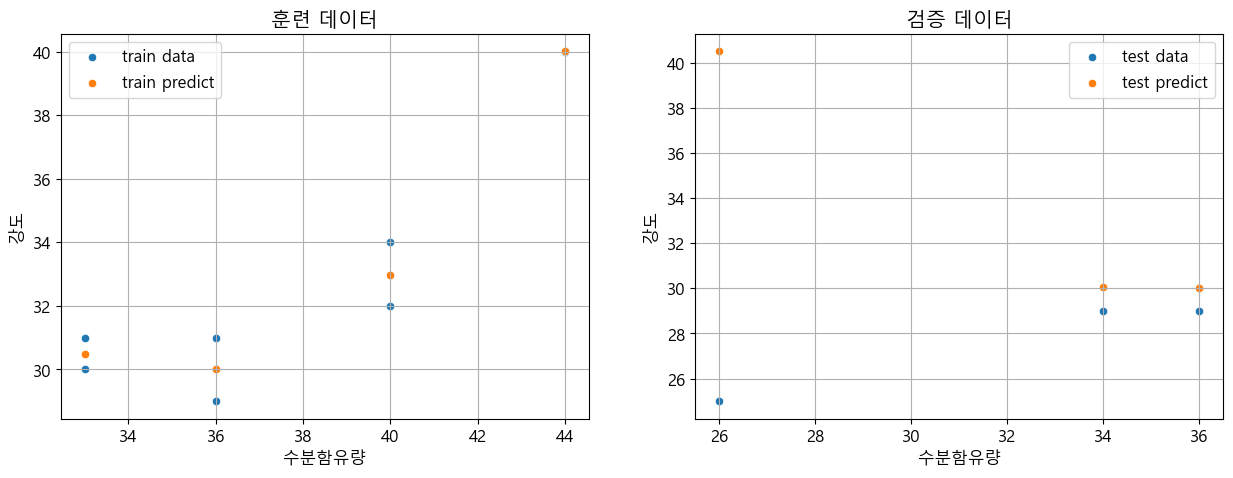

In [20]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

# 훈련 데이터
sb.scatterplot(x=x_train['수분함유량'], y=y_train['강도'], label='train data', ax=ax1)
sb.scatterplot(x=x_train['수분함유량'], y=y_train_pred, label='train predict', ax=ax1)

ax1.set_title("훈련 데이터")
ax1.legend()
ax1.grid()

# 검증 데이터
sb.scatterplot(x=x_test['수분함유량'], y=y_test['강도'], label='test data', ax=ax2)
sb.scatterplot(x=x_test['수분함유량'], y=y_test_pred, label='test predict', ax=ax2)

ax2.set_title("검증 데이터")
ax2.legend()
ax2.grid()

plt.show()
plt.close()